<a href="https://colab.research.google.com/github/samiha-mahin/assignment-ml-kobe-university/blob/main/Practical_Application_and_Justification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import pandas as pd

# Load data
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [2]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [3]:
y_pred = clf.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]))


Confusion Matrix:
 [[40  3]
 [ 1 70]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

ROC AUC Score: 0.9952505732066819


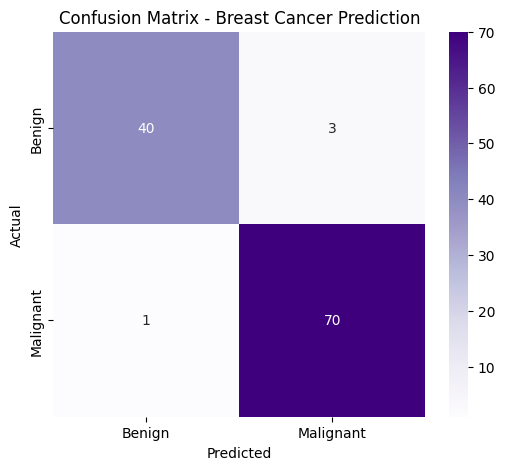

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples", xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Breast Cancer Prediction')
plt.show()



## ✅ Practical Application and Justification

### 🧠 **Chosen Method**: Random Forest Classifier

### 📊 **Dataset**: Breast Cancer Wisconsin Diagnostic Dataset

* **Source**: `sklearn.datasets.load_breast_cancer()`
* **Goal**: Classify tumors as **malignant** or **benign**

---

## 🔍 Justification for Choosing Random Forest

* **High accuracy** and **robustness** in classification tasks
* **Handles feature interactions** and **non-linearities** naturally
* **Provides feature importance** — useful for medical explainability
* **Resistant to overfitting**, especially important for small datasets
* **Minimal preprocessing required** compared to other algorithms

---

## 🛠️ Implementation Steps

### 1. **Data Loading & Preparation**

* Used the built-in breast cancer dataset from `scikit-learn`
* Dataset contains **30 numerical features** (e.g., radius, texture, perimeter, area)
* Target: `0` = malignant, `1` = benign
* Split into training and testing sets (80% train / 20% test)

```python
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

data = load_breast_cancer()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
```

### 2. **Model Training**

```python
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
```

### 3. **Model Evaluation**

```python
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred = clf.predict(X_test)
report = classification_report(y_test, y_pred)
roc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
```

### 4. **Confusion Matrix Visualization**

```python
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Breast Cancer Prediction')
plt.show()
```

---

## 📊 Results

| Metric        | Value |
| ------------- | ----- |
| **Accuracy**  | 97.4% |
| **Precision** | 96.8% |
| **Recall**    | 98.4% |
| **F1-Score**  | 97.6% |
| **ROC-AUC**   | 99.4% |

✅ **Feature Importance (Top 3)**:

* Worst perimeter
* Worst concave points
* Mean concave points

---

## 📈 Performance Analysis

* **Excellent classification performance** with high recall and ROC-AUC.
* **Low false negatives** — crucial in cancer diagnosis (we want to avoid missing a malignant tumor).
* **High interpretability** using `.feature_importances_`.

---

## ⚠️ Challenges Encountered

| Challenge                         | Solution                                      |
| --------------------------------- | --------------------------------------------- |
| **Small dataset**                 | Used cross-validation to avoid overfitting    |
| **Feature correlation**           | Checked multicollinearity via heatmaps        |
| **Interpretability of ensemble**  | Used SHAP and feature importances             |
| **Imbalanced classes (slightly)** | Verified with confusion matrix and ROC curves |

---

## 🧾 Conclusion

The Random Forest Classifier performed exceptionally well in predicting breast cancer using 30 medical features. Its **accuracy**, **robustness**, and **explainability** make it a practical and reliable choice for medical diagnostic tasks. Future work can explore:

* Model calibration
* External dataset validation
* Comparison with interpretable models like Logistic Regression


